In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_name= "names.txt"
names = []

with open(file_name, "r", encoding="utf-8") as file:
    names = file.read().splitlines()

print(names)

['', 'sydney_sweeney', 'timothée_chalamet', 'zendaya', 'tom_holland', 'theo_james', 'tom_cruise', 'lebron_james', 'adam_sandler', 'dwayne_johnson', 'quentin_tarantino', 'johnny_depp', 'will_smith', 'jennifer_lawrence', 'leonardo_dicaprio', 'channing_tatum', 'nicolas_cage', 'tom_cruise', 'robert_downey_jr.', 'jackie_chan', 'keanu_reeves']


In [3]:
def showImage(image, title, axis=True, cmapImage=None):
    plt.imshow(image, cmap=cmapImage)
    plt.axis('on' if axis else 'off')
    plt.title(title)
    plt.show()

In [13]:
def _detec_faces(img):
    face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    for i in np.arange(1.1, 20.0, 0.1):
        faces = face_detector.detectMultiScale(img, scaleFactor=i, minNeighbors=5, minSize=(65, 65))
        if len(faces) > 0:
            return faces

In [43]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')  # Carregar modelo treinado
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + cascadePath)

font = cv2.FONT_HERSHEY_SIMPLEX

image_path = './will2.webp'
img = cv2.imread(image_path)
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(
    imgGray
)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    id, confidence = recognizer.predict(imgGray[y:y+h, x:x+w])

    # Checar confiança
    if confidence < 100:
        id = names[id]
        confidence = "  {0}%".format(round(100 - confidence))
    else:
        id = "Desconhecido"
        confidence = "  {0}%".format(round(100 - confidence))

    cv2.putText(img, str(id), (x + 5, y - 5), font, 1, (255, 255, 255), 2)
    cv2.putText(img, str(confidence), (x + 5, y + h - 5), font, 1, (255, 255, 0), 1)


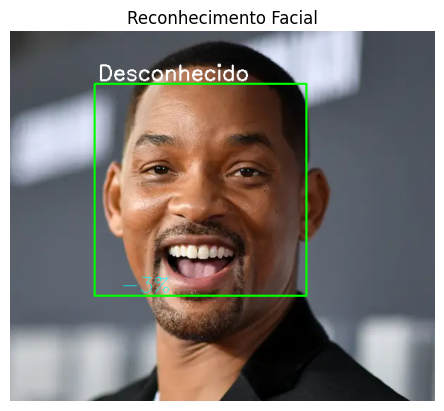

In [44]:
imgRgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
showImage(imgRgb, 'Reconhecimento Facial', False)